# Анализ оттока клиентов банка «Метанпром»

**Задача:**
* Провести анализ оттока клиентов регионального банка 
* выделить портреты клиентов, которые склонны уходить из банка
* Проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

**Цель**
 минимизировать отток клиентов
 
**Заказчик**
менеджер продукта

**Результат:**
презентация с выводами и рекомендациями и дашборд

*Презентация:*
<https://disk.yandex.ru/i/vFiWgoNithueHg>


*Дашборд:*

<https://public.tableau.com/views/Final_proekt_16765554432750/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link>


Оглавление:

[1. Обзор данных](#start)

[2. Предобработка данных](#second)
 
   [2.1 Приведем наименования столбцов к стандартному виду](#second_one)
 
   [2.2 Меняем категориальные данные в столбцах city и gender](#secon_two)
 
   [2.3  Проверка на дубликаты](#second_three)
 
   [2.4 Анализ пропусков](#second_four)
    
[3. Исследовательский анализ данных (EDA)](#three)
 
   [3.1 Общее распределение признаков клиентов банка](#three_one)
 
   [3.2  Матрица корреляций](#three_two)
 
   [3.3 Распределение признаков относительно оттока клиентов](#three_three)
 
   [3.3.1 Посмотрим на ушедших по возрасту.](#three_three_one)
 
   [3.3.2 Посмотрим на ушедших по количеству имеющихся продуктов.](#three_three_two)
 
   [3.3.3 Посмотрим по городам относительно оттока](#three_three_three)
  
   [3.4 Портрет клиента относительно оттока](#three_four)
    
[4. Проверка гипотез](#four)
  
   [4.1 Проверим гипотезу: разницы в доходах между клиентами, которые ушли и остались, нет.](#four_one)
  
   [4.2 Проверим гипотезу о различии score (кредитного рейтинга) между теми клиентами, которые ушли и теми, которые остались](#four_two)
  
   [4.3 Проверим гипотезу о влиянии количества объектов недвижимости во владении клиента на его отток из банка](#four_three)
  
   [4.4 Вывод](#four_four)
    
[5. Общий вывод](#five)
  
   [5.1 ОШИБКИ](#five_one)
  
   [5.2 Выводы](#five_two)
  
   [5.3 Рекомендации](#five_three)



## 1. Обзор данных <a class="anchor" id="start"></a>



In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
# pip install seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats as st
import numpy as np
import plotly.express as px

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [4]:
#открываем и сохраняем как датафрейм файл с данными:
try:
    # personal path
    bank = pd.read_csv('C:/Users/wzick/Desktop/Практикум/Юпитер-тетрадки/bank_dataset.csv')  
except:
    # Yandex path
    bank = pd.read_csv('/datasets/bank_dataset.csv')

display(bank.head(10))
display(bank.info())
display(bank.describe())
display(bank['City'].unique())


userid  score            City Gender  Age  Objects    Balance  Products  \
0  15677338    619       Ярославль      Ж   42        2        NaN         1   
1  15690047    608         Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502       Ярославль      Ж   42        8  159660.80         3   
3  15744090    699       Ярославль      Ж   39        1        NaN         2   
4  15780624    850         Рыбинск      Ж   43        2  125510.82         1   
5  15616748    645         Рыбинск      М   44        8  113755.78         2   
6  15635267    822       Ярославль      М   50        7        NaN         2   
7  15698884    376  Ростов Великий      Ж   29        4  115046.74         4   
8  15835101    501       Ярославль      М   44        4  142051.07         2   
9  15635125    684       Ярославль      М   27        2  134603.88         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1         101348.88      1  
1           0        1         112542.58      0  
2           1        0         113931.57      1  
3           0        0          93826.63      0  
4           1        1          79084.10      0  
5           1        0         149756.71      1  
6           1        1          10062.80      0  
7           1        0         119346.88      1  
8           0        1          74940.50      0  
9           1        1          71725.73      0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

userid         score           Age       Objects        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000    6383.000000   
mean   1.573368e+07    650.528800     38.921800      5.012800  119827.493793   
std    7.193619e+04     96.653299     10.487806      2.892174   30095.056462   
min    1.560844e+07    350.000000     18.000000      0.000000    3768.690000   
25%    1.567126e+07    584.000000     32.000000      3.000000  100181.975000   
50%    1.573347e+07    652.000000     37.000000      5.000000  119839.690000   
75%    1.579597e+07    718.000000     44.000000      7.000000  139512.290000   
max    1.585843e+07    850.000000     92.000000     10.000000  250898.090000   

           Products   CreditCard       Loyalty  estimated_salary         Churn  
count  10000.000000  10000.00000  10000.000000      10000.000000  10000.000000  
mean       1.530200      0.70550      0.515100     100090.239881      0.203700  
std        0.581654      0.45584      0.499797      57510.492818      0.402769  
min        1.000000      0.00000      0.000000         11.580000      0.000000  
25%        1.000000      0.00000      0.000000      51002.110000      0.000000  
50%        1.000000      1.00000      1.000000     100193.915000      0.000000  
75%        2.000000      1.00000      1.000000     149388.247500      0.000000  
max        4.000000      1.00000      1.000000     199992.480000      1.000000

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

Датасет содержит данные о клиентах банка «Метанпром». 
Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга ,
- `City` — город (Ярославль, Рыбинск и Ростов Великий),
- `Gender` — пол (М и Ж)
- `Age` — возраст (от 18 до 92),
- `Objects` — количество объектов в собственности (от 0 до 10 максимум),
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент (от 1 до 4),
- `CreditCard` — есть ли кредитная карта (0- нет, 1 - есть),
- `Loyalty` — активный клиент (0- неактивный, 1 - активный),
- `estimated_salary` — заработная плата клиента (от 11.58 до 199992.48),
- `Churn` — ушёл или нет (1 - ушел, 0 - нет).

Нет понимания за какой период данные, и за какой срок брали понимание активности : неделя, месяц, год. Это не позволит посмотреть в динамике на отток клиентов. И активный клиент - это сколько он совершил действий: 1, 2 или 10? 

## 2. Предобработка данных <a class="anchor" id="second"></a>

### 2.1 Приведем наименования столбцов к стандартному виду <a class="anchor" id="second_one"></a>

In [5]:
bank.columns = bank.columns.str.lower() # делаем все буквы строчными
bank=bank.rename(columns={'userid':'user_id', 'creditcard':'credit_card'}) # делаем все названия в "змеином регистре"
bank.head(10)

user_id  score            city gender  age  objects    balance  products  \
0  15677338    619       Ярославль      Ж   42        2        NaN         1   
1  15690047    608         Рыбинск      Ж   41        1   83807.86         1   
2  15662040    502       Ярославль      Ж   42        8  159660.80         3   
3  15744090    699       Ярославль      Ж   39        1        NaN         2   
4  15780624    850         Рыбинск      Ж   43        2  125510.82         1   
5  15616748    645         Рыбинск      М   44        8  113755.78         2   
6  15635267    822       Ярославль      М   50        7        NaN         2   
7  15698884    376  Ростов Великий      Ж   29        4  115046.74         4   
8  15835101    501       Ярославль      М   44        4  142051.07         2   
9  15635125    684       Ярославль      М   27        2  134603.88         1   

   credit_card  loyalty  estimated_salary  churn  
0            1        1         101348.88      1  
1            0        1         112542.58      0  
2            1        0         113931.57      1  
3            0        0          93826.63      0  
4            1        1          79084.10      0  
5            1        0         149756.71      1  
6            1        1          10062.80      0  
7            1        0         119346.88      1  
8            0        1          74940.50      0  
9            1        1          71725.73      0

### 2.2 Меняем категориальные данные в столбцах city и gender <a class="anchor" id="second_two"></a>

In [6]:
bank['city_number']=bank['city']
category = {"gender": {"М": 1, "Ж": 0},
            "city_number": {"Ярославль": 0, "Рыбинск": 1, "Ростов Великий": 2}}
bank=bank.replace(category)

bank = pd.get_dummies(bank) # разделяем столбец  city на три - для каждого города
bank.head()

user_id  score  gender  age  objects    balance  products  credit_card  \
0  15677338    619       0   42        2        NaN         1            1   
1  15690047    608       0   41        1   83807.86         1            0   
2  15662040    502       0   42        8  159660.80         3            1   
3  15744090    699       0   39        1        NaN         2            0   
4  15780624    850       0   43        2  125510.82         1            1   

   loyalty  estimated_salary  churn  city_number  city_Ростов Великий  \
0        1         101348.88      1            0                    0   
1        1         112542.58      0            1                    0   
2        0         113931.57      1            0                    0   
3        0          93826.63      0            0                    0   
4        1          79084.10      0            1                    0   

   city_Рыбинск  city_Ярославль  
0             0               1  
1             1               0  
2             0               1  
3             0               1  
4             1               0

### 2.3  Проверка на дубликаты <a class="anchor" id="second_three"></a>

In [7]:
print('всего дубликатов:{}'.format(bank.duplicated().sum()))
print('всего дубликатов в estimated_salary:{}'.format(bank['estimated_salary'].duplicated().sum()))



всего дубликатов:0
всего дубликатов в estimated_salary:1


Полных дубликатов, вообще нет. Есть 1 в заработной плате - это случайность. 

### 2.4 Анализ пропусков <a class="anchor" id="second_four"></a>

In [8]:
# посмотрим на пропуски 'balance' по городам
nan_city = bank.query('balance.isna()').groupby('city_number')['city_number'].count()
print('всего пропусков по городам:')
display(nan_city)

cnt_city = bank.groupby('city_number')['user_id'].count()
print('всего клиентов по городам')
display(cnt_city)

part_nan_city=nan_city/cnt_city
print('доля пропусков:',part_nan_city)

всего пропусков по городам:


city_number
0    2418
1    1199
Name: city_number, dtype: int64

всего клиентов по городам


city_number
0    5014
1    2477
2    2509
Name: user_id, dtype: int64

доля пропусков: city_number
0    0.482250
1    0.484053
2         NaN
dtype: float64


#### В городе - 2 - Ростов Великий в столбце 'balance' совсем нет пропусков. А в Ярославле - 0 - почти 48%, а в Рыбинске -1 - 48%. Так что просто их удалить или заполнить нулями - не получится, сильно исказится картина данных. 

In [9]:
# посмотрим на пропуски 'balance' по оттоку 'churn'

nan_churn = bank.query('balance.isna()').groupby('churn')['churn'].count()
print('всего пропусков баланса по оттоку:')
display(nan_churn) 
churn_cnt = bank.groupby('churn')['churn'].count()
all_cnt = churn_cnt[0]+churn_cnt[1]

churn_cnt

всего пропусков баланса по оттоку:


churn
0    3117
1     500
Name: churn, dtype: int64

churn
0    7963
1    2037
Name: churn, dtype: int64

Пропуски баланса есть и среди ушедших клиентов и среди оставшихся.

In [10]:
bank.query('balance == 0')

Empty DataFrame
Columns: [user_id, score, gender, age, objects, balance, products, credit_card, loyalty, estimated_salary, churn, city_number, city_Ростов Великий, city_Рыбинск, city_Ярославль]
Index: []

Клиентов с нулевым балансом, вообще, нет.

**Вывод** 
В Ростове Великом выгрузили данные, изначально не включив клиентов с 0 балансом, а в Ярославле и Рыбинске, скорее всего, пропуски как раз и связаны с тем что это 0 балансы. И пропуски не связаны с оттоком клиентов. Так как 3 базы соединены, то считаю, то нельзя заменять пропуски на 0, оставим данные как есть.


##   3. Исследовательский анализ данных (EDA) <a class="anchor" id="three"></a>

### 3.1 Общее распределение признаков клиентов банка <a class="anchor" id="three_one"></a>


In [11]:
display(bank.describe())

user_id         score        gender           age       objects  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
mean   1.573368e+07    650.528800      0.545700     38.921800      5.012800   
std    7.193619e+04     96.653299      0.497932     10.487806      2.892174   
min    1.560844e+07    350.000000      0.000000     18.000000      0.000000   
25%    1.567126e+07    584.000000      0.000000     32.000000      3.000000   
50%    1.573347e+07    652.000000      1.000000     37.000000      5.000000   
75%    1.579597e+07    718.000000      1.000000     44.000000      7.000000   
max    1.585843e+07    850.000000      1.000000     92.000000     10.000000   

             balance      products  credit_card       loyalty  \
count    6383.000000  10000.000000  10000.00000  10000.000000   
mean   119827.493793      1.530200      0.70550      0.515100   
std     30095.056462      0.581654      0.45584      0.499797   
min      3768.690000      1.000000      0.00000      0.000000   
25%    100181.975000      1.000000      0.00000      0.000000   
50%    119839.690000      1.000000      1.00000      1.000000   
75%    139512.290000      2.000000      1.00000      1.000000   
max    250898.090000      4.000000      1.00000      1.000000   

       estimated_salary         churn   city_number  city_Ростов Великий  \
count      10000.000000  10000.000000  10000.000000         10000.000000   
mean      100090.239881      0.203700      0.749500             0.250900   
std        57510.492818      0.402769      0.830433             0.433553   
min           11.580000      0.000000      0.000000             0.000000   
25%        51002.110000      0.000000      0.000000             0.000000   
50%       100193.915000      0.000000      0.000000             0.000000   
75%       149388.247500      0.000000      2.000000             1.000000   
max       199992.480000      1.000000      2.000000             1.000000   

       city_Рыбинск  city_Ярославль  
count  10000.000000    10000.000000  
mean       0.247700        0.501400  
std        0.431698        0.500023  
min        0.000000        0.000000  
25%        0.000000        0.000000  
50%        0.000000        1.000000  
75%        0.000000        1.000000  
max        1.000000        1.000000

C:\Users\wzick\AppData\Local\Temp\ipykernel_10588\2051226681.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label="Остался", bins = 11, axlabel = False, color = ['red'])
C:\Users\wzick\AppData\Local\Temp\ipykernel_10588\2051226681.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.gith

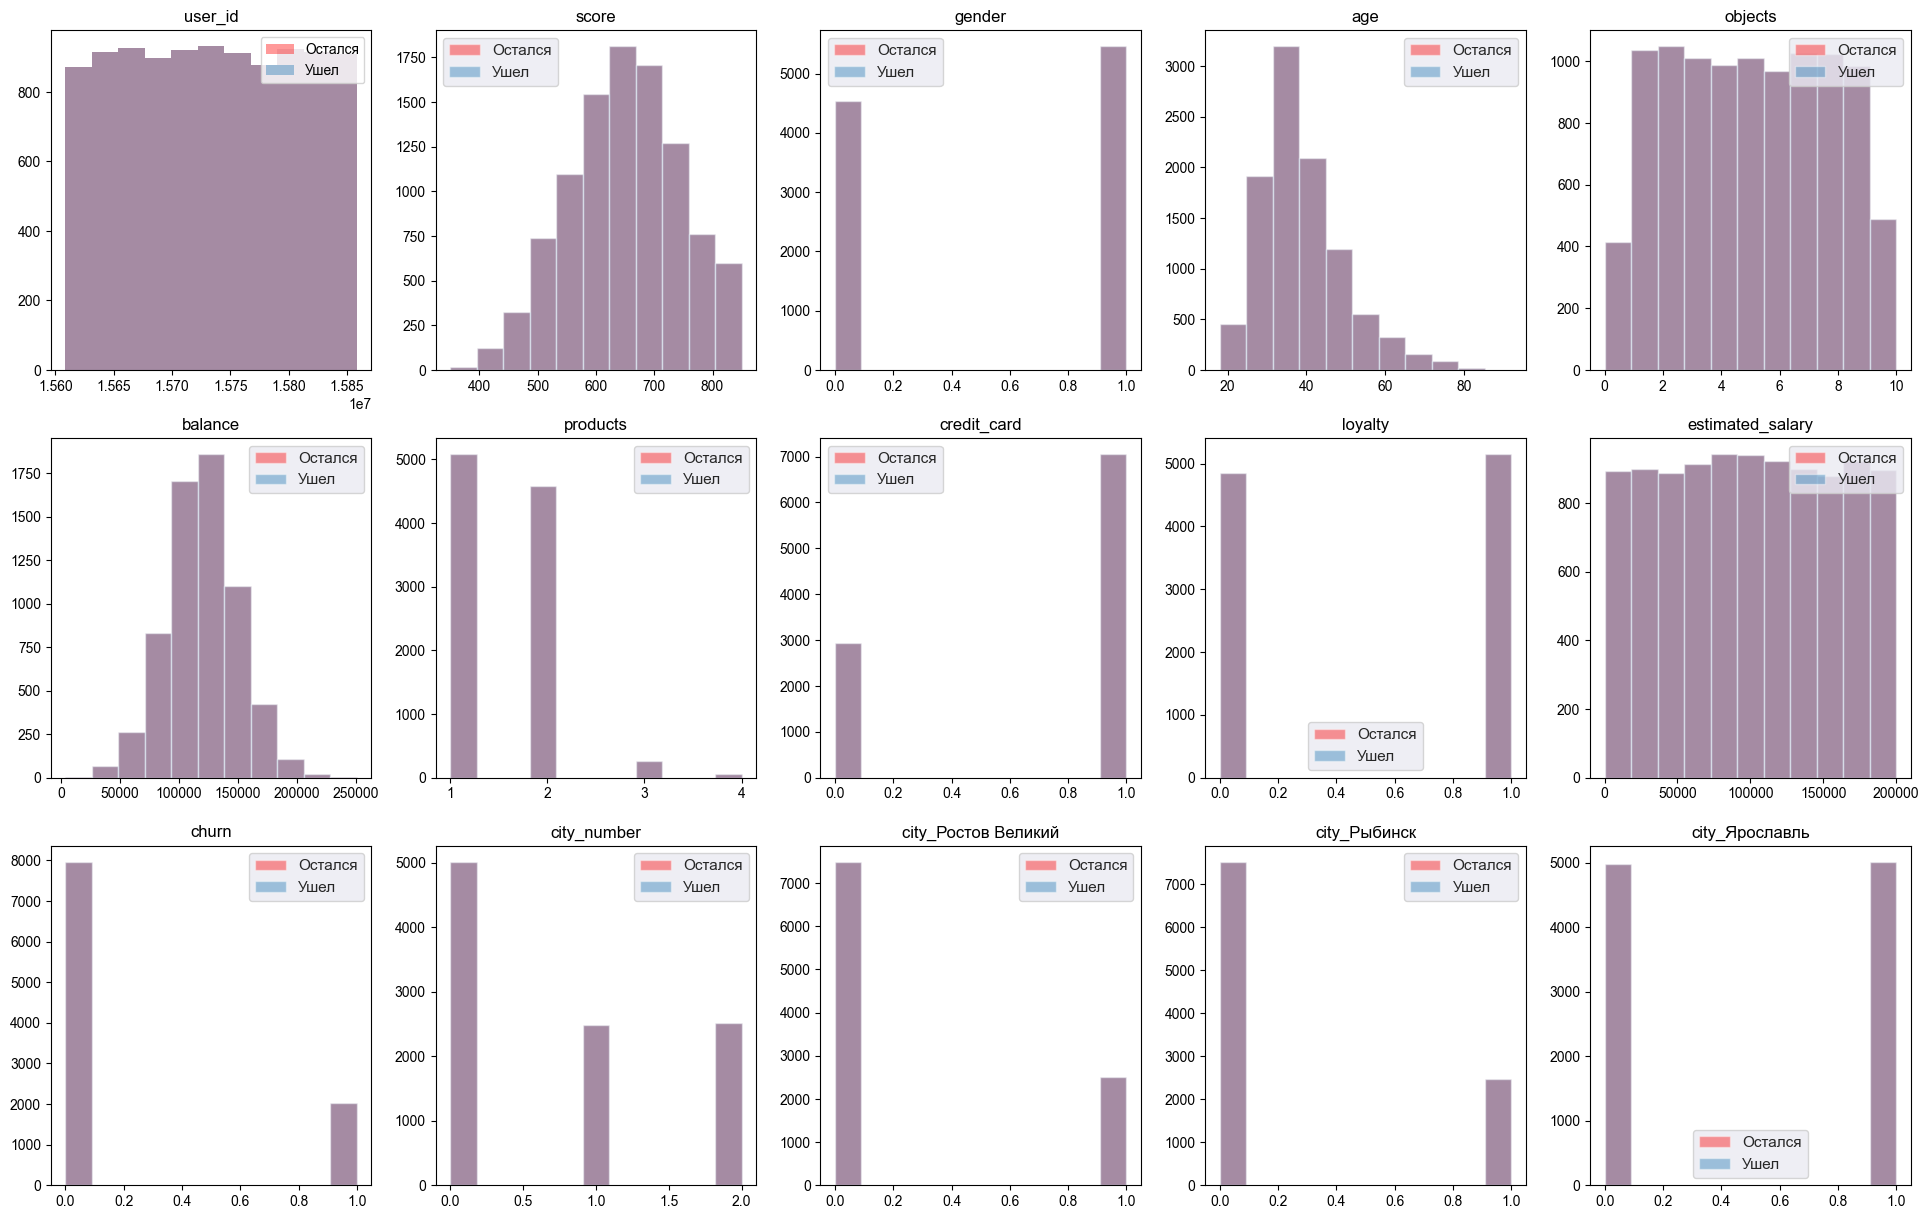

In [12]:
 #функция построения графиков для двух датасетов.
def graph(data1, data2):
    fig, ax = plt.subplots(3,5, figsize = (24,15))
    ax = ax.ravel()
    
    for i in range(len(bank.columns)):
            column = bank.columns[i]
            range_graph = (bank[column].min(), bank[column].max()) 
            sns.distplot(data1[column], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label="Остался", bins = 11, axlabel = False, color = ['red'])      
            sns.distplot(data2[column], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label="Ушел", bins = 11, axlabel = False)
            ax[i].legend()
            ax[i].set_title(column)
            sns.set()
    
    plt.show()
graph(bank, bank)    

1. score — баллы кредитного скоринга от 350 до 850, средний балл - 652.
2. Пол: Женский - чуть меньше половины, мужчин - больше, но не существенно.
3. Возраст от 18 до 92, средний - 37. Наибольшее число клиентов в возрасте от 32 до 44 лет.
4. Число объектов от 0 до 10, в среднем - 5, но число клиентов примерно по 1000 одинаково для объектов от1 до 9 штук, только около 400 - не имеют объектов в собственности и почти 500 имеют 10 объектов. 
5. Баланс - от 3768 до 250898.09, большая часть клиентов имеет на балансе от 100000 до 140000
6. У большинства клиентов 1 или 2 продукта банка, тех кто имеет 3 или 4 совсем мало.
7. Кредитной картой обладает почти 7000 клиентов
8. Отношение к банку - лояльность распределились почти поровну. 
9. Заработная плата распределена довольно равномерно
10. ушедших клиентов много - почти 2000 из 10000. 

## 3.2  Матрица корреляций <a class="anchor" id="three_two"></a>

In [13]:
phik = bank.phik_matrix().round(2)
phik

interval columns not set, guessing: ['user_id', 'score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_number', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


user_id  score  gender   age  objects  balance  products  \
user_id                 1.00   0.02    0.00  0.04     0.00     0.02      0.01   
score                   0.02   1.00    0.00  0.00     0.00     0.00      0.03   
gender                  0.00   0.00    1.00  0.03     0.04     0.00      0.06   
age                     0.04   0.00    0.03  1.00     0.04     0.00      0.15   
objects                 0.00   0.00    0.04  0.04     1.00     0.07      0.06   
balance                 0.02   0.00    0.00  0.00     0.07     1.00      0.04   
products                0.01   0.03    0.06  0.15     0.06     0.04      1.00   
credit_card             0.00   0.00    0.00  0.02     0.03     0.05      0.00   
loyalty                 0.01   0.04    0.03  0.19     0.02     0.02      0.06   
estimated_salary        0.00   0.03    0.03  0.05     0.00     0.00      0.03   
churn                   0.03   0.10    0.17  0.49     0.02     0.11      0.57   
city_number             0.00   0.04    0.01  0.09     0.01     0.13      0.05   
city_Ростов Великий     0.02   0.02    0.03  0.09     0.02     0.14      0.10   
city_Рыбинск            0.00   0.03    0.02  0.00     0.00     0.07      0.04   
city_Ярославль          0.01   0.03    0.00  0.07     0.03     0.08      0.06   

                     credit_card  loyalty  estimated_salary  churn  \
user_id                     0.00     0.01              0.00   0.03   
score                       0.00     0.04              0.03   0.10   
gender                      0.00     0.03              0.03   0.17   
age                         0.02     0.19              0.05   0.49   
objects                     0.03     0.02              0.00   0.02   
balance                     0.05     0.02              0.00   0.11   
products                    0.00     0.06              0.03   0.57   
credit_card                 1.00     0.01              0.00   0.00   
loyalty                     0.01     1.00              0.03   0.24   
estimated_salary            0.00     0.03              1.00   0.00   
churn                       0.00     0.24              0.00   1.00   
city_number                 0.00     0.01              0.03   0.10   
city_Ростов Великий         0.00     0.03              0.02   0.27   
city_Рыбинск                0.01     0.02              0.03   0.08   
city_Ярославль              0.00     0.00              0.00   0.16   

                     city_number  city_Ростов Великий  city_Рыбинск  \
user_id                     0.00                 0.02          0.00   
score                       0.04                 0.02          0.03   
gender                      0.01                 0.03          0.02   
age                         0.09                 0.09          0.00   
objects                     0.01                 0.02          0.00   
balance                     0.13                 0.14          0.07   
products                    0.05                 0.10          0.04   
credit_card                 0.00                 0.00          0.01   
loyalty                     0.01                 0.03          0.02   
estimated_salary            0.03                 0.02          0.03   
churn                       0.10                 0.27          0.08   
city_number                 1.00                 1.00          1.00   
city_Ростов Великий         1.00                 1.00          0.50   
city_Рыбинск                1.00                 0.50          1.00   
city_Ярославль              1.00                 0.79          0.79   

                     city_Ярославль  
user_id                        0.01  
score                          0.03  
gender                         0.00  
age                            0.07  
objects                        0.03  
balance                        0.08  
products                       0.06  
credit_card                    0.00  
loyalty                        0.00  
estimated_salary               0.00  
churn                          0.16  
city_numbe

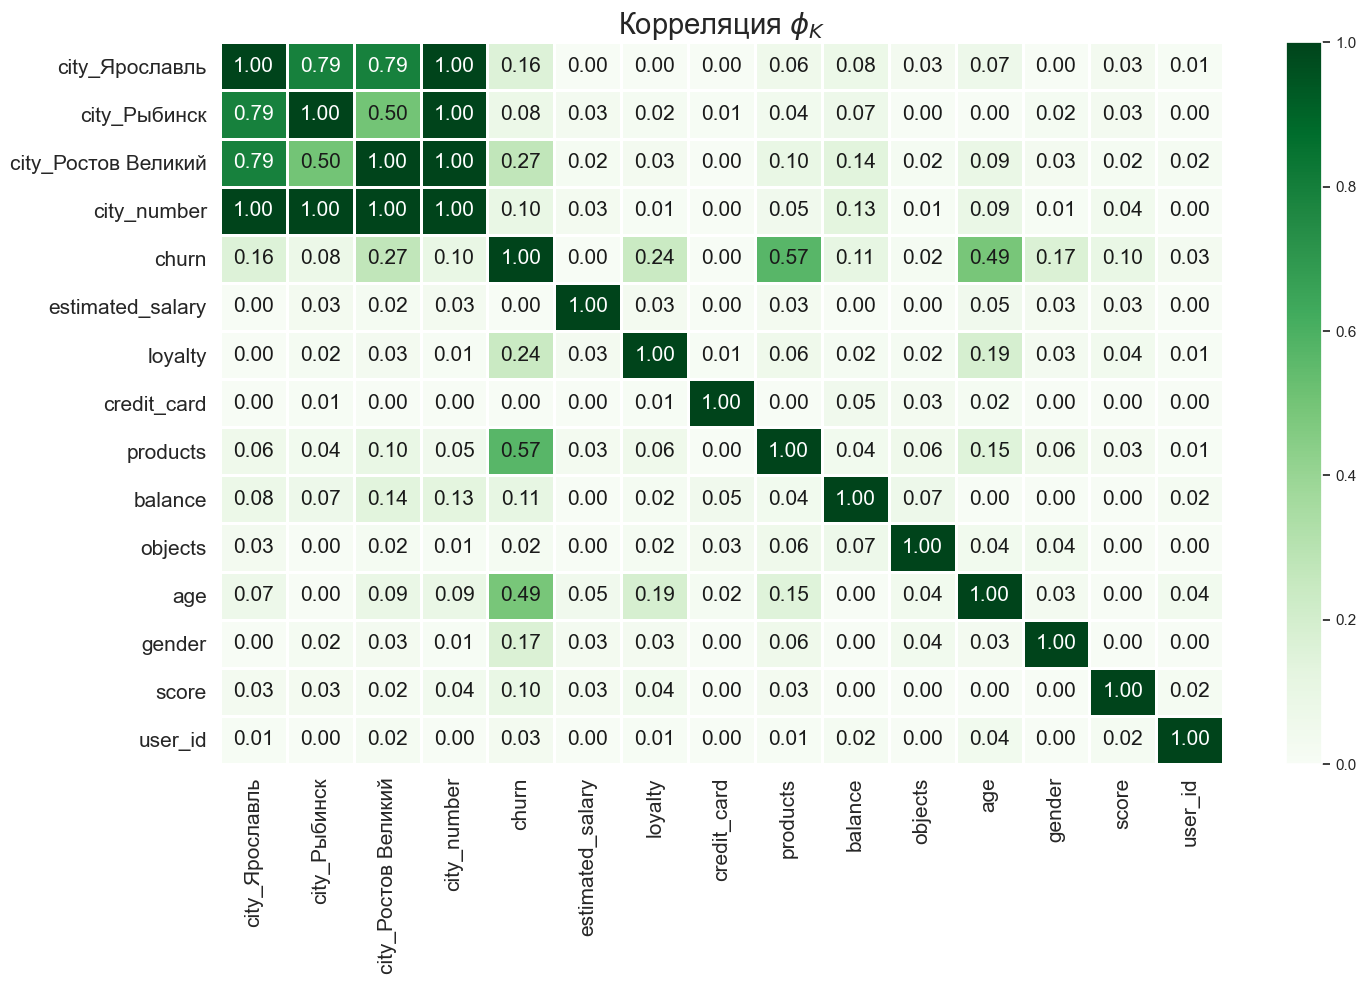

In [14]:
plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Корреляция $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(15, 10),
                       )
plt.tight_layout()

interval columns not set, guessing: ['user_id', 'score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_number', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


C:\Users\wzick\AppData\Local\Programs\Python\Python311\Lib\site-packages\phik\report.py:267: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.

C:\Users\wzick\AppData\Local\Temp\ipykernel_10588\3454187246.py:8: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



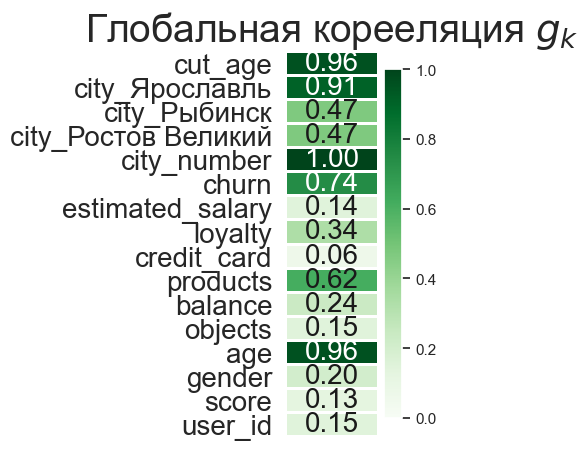

In [42]:
global_correlation, global_labels = bank.global_phik()

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(1.5,5),
                        color_map="Greens", title=r"Глобальная корееляция $g_k$",
                        fontsize_factor=2)
plt.tight_layout()

interval columns not set, guessing: ['user_id', 'score', 'gender', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_number', 'city_Ростов Великий', 'city_Рыбинск', 'city_Ярославль']


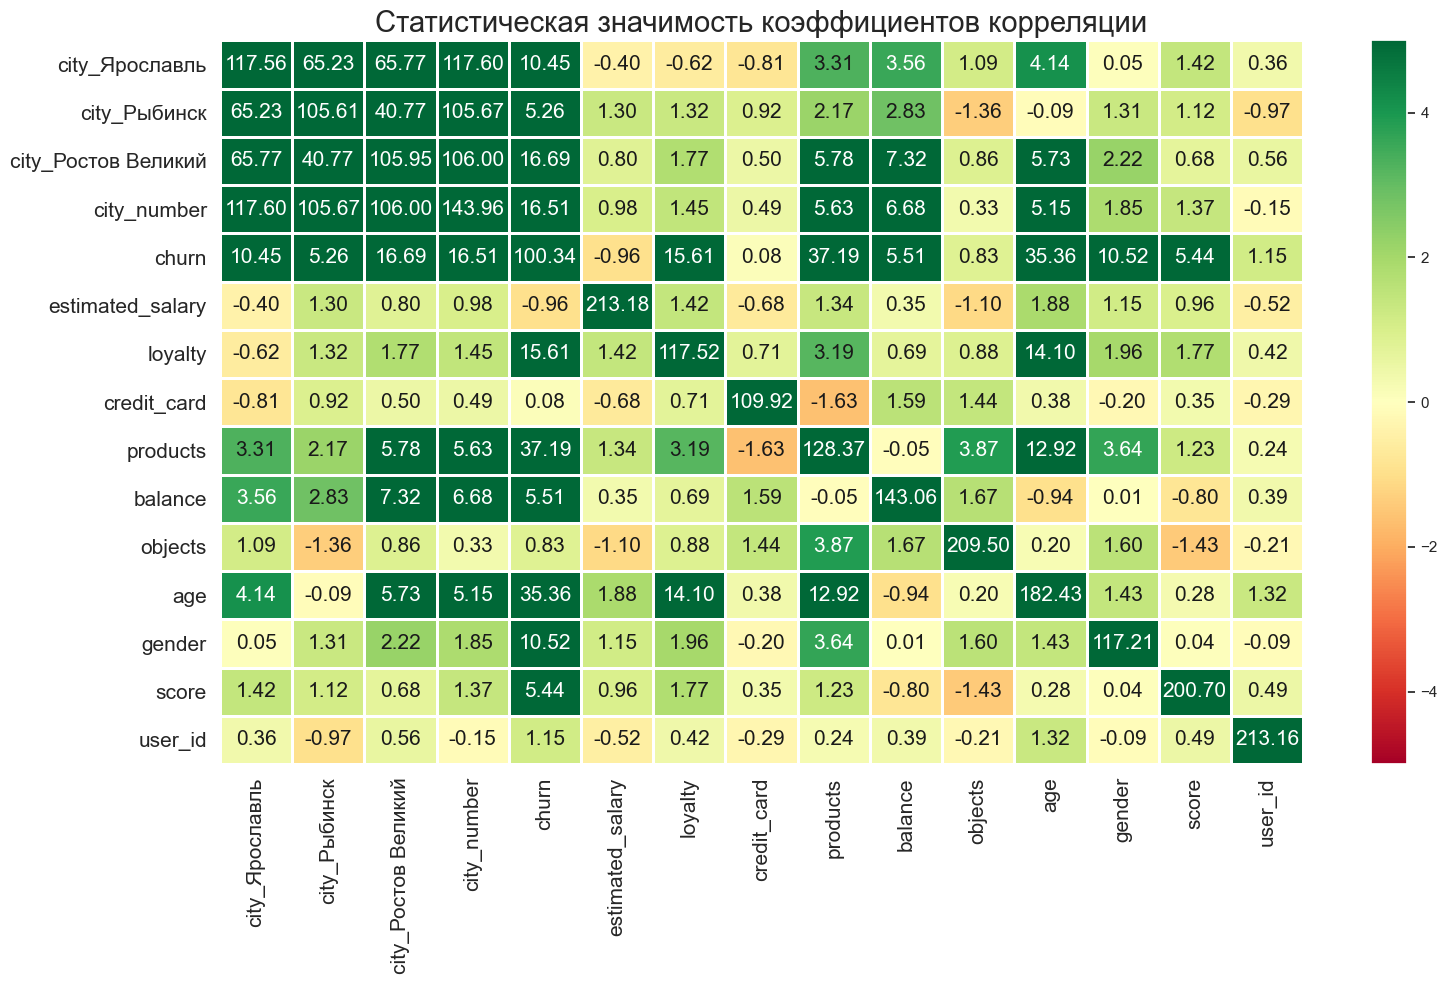

In [16]:
significance_overview = bank.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Статистическая значимость коэффициентов корреляции", 
                        usetex=False, fontsize_factor=1.5, figsize=(16, 10))
plt.tight_layout()

Мы видим, что между 'churn' и 'products' - 0.57, а также 'churn' и 'age' - 0.49 прослеживвается корреляция. Глобальные коэффинциенты также высокие. И это подтверждается статистической значимостью коэффициентов корреляции данных признаков относительно оттока. посмотрим на эти признаки подробнее ниже.

Корреляция между собой признаков категориальных столбцов city_... объясняется самим их определением.
Выделяется корреляция оттока и Ростова Великого.  Обратим внимание.

###  3.3 Распределение признаков относительно оттока клиентов <a class="anchor" id="three_three"></a>

C:\Users\wzick\AppData\Local\Temp\ipykernel_10588\2051226681.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[column], ax=ax[i], kde=False, hist_kws = {'range': range_graph}, label="Остался", bins = 11, axlabel = False, color = ['red'])
C:\Users\wzick\AppData\Local\Temp\ipykernel_10588\2051226681.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.gith

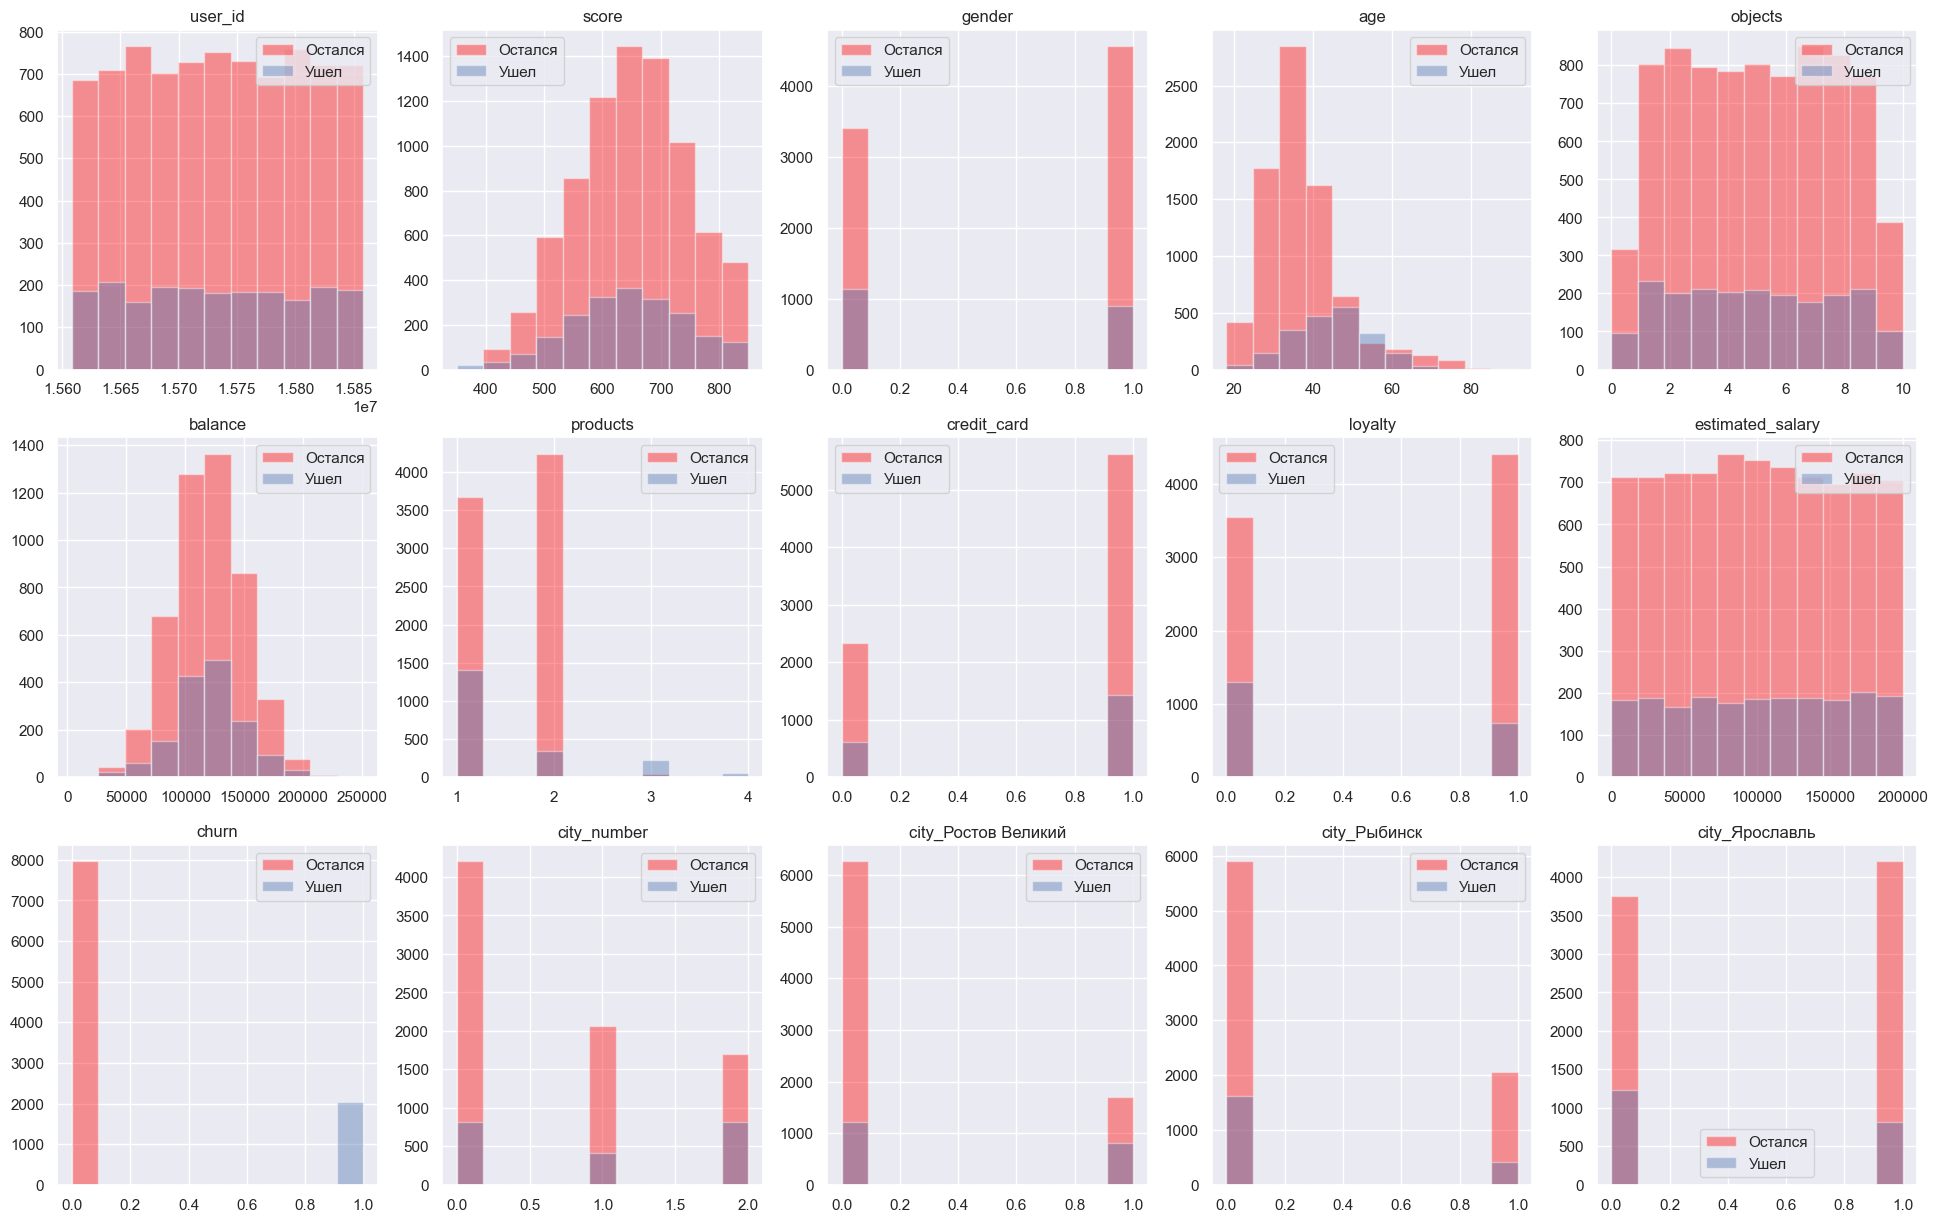

In [17]:
churn_0 = bank[bank['churn'] == 0] # кто остался
churn_1 = bank[bank['churn'] == 1] # кто ушёл

graph(churn_0, churn_1)

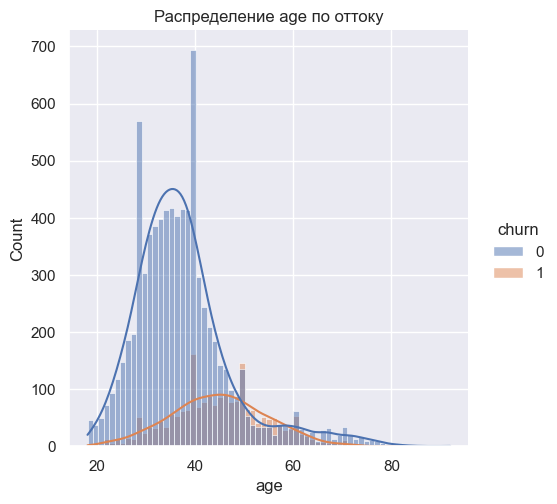

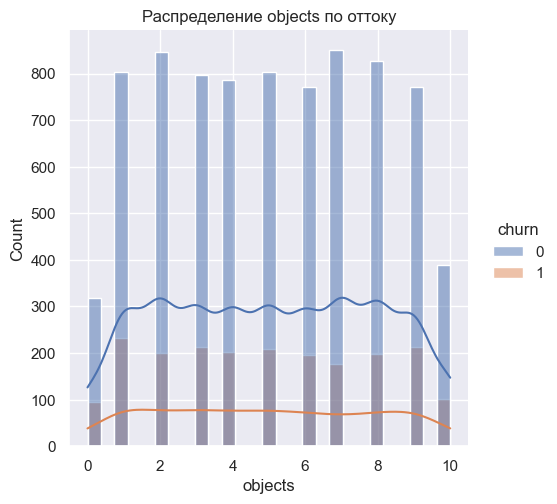

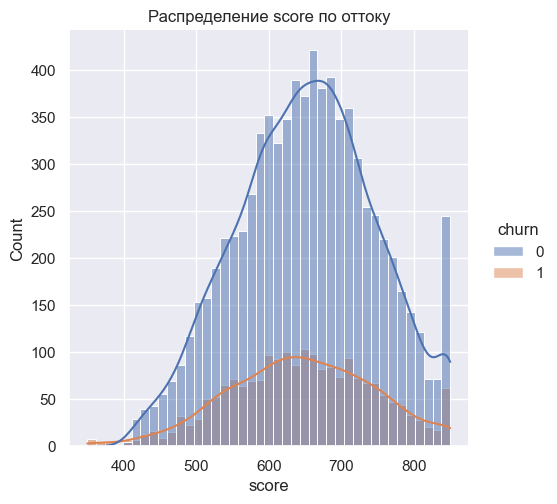

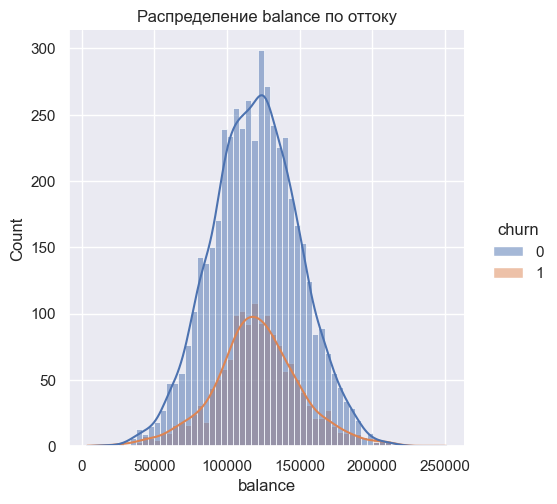

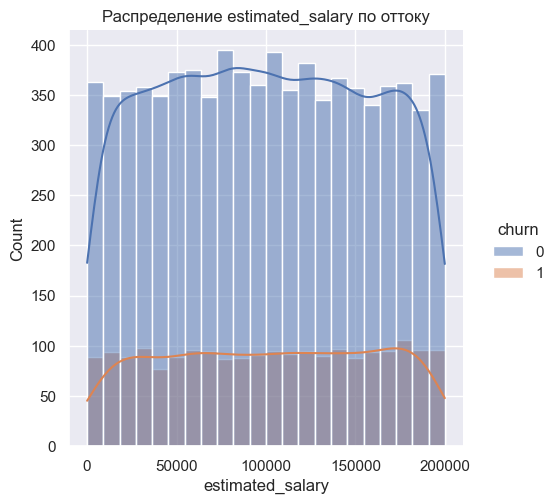

In [18]:
column_spisok = ['age', 'objects', 'score',  'balance', 'estimated_salary']

for column in column_spisok:
    
    sns.displot(
        x = bank[column], 
       # col='city_number', 
        hue='churn', 
        kde=True, data = bank).set(title=(f'Распределение {column} по оттоку'))
    
plt.show()
   


Что можно сказать по графикам:
* больше всего ушедших в г. Ростов Великий,
* женщины также чаще склонны уходить,
* среди нелояльных клиентов, гораздо выше процент ушедших,
* кого есть кредитные карты, так же чаще уходят,
* более возрастные клиенты чаще уходят, чем молодые. На графике плотности ядра (kde) видно, что отток сдвинут в сторону 50ти лет.
* Люди, у которых 2 продукта, практически не уходят, в отличие от тех, у кого всего 1 продукт банка, а большее число продуктов практически все ушли.


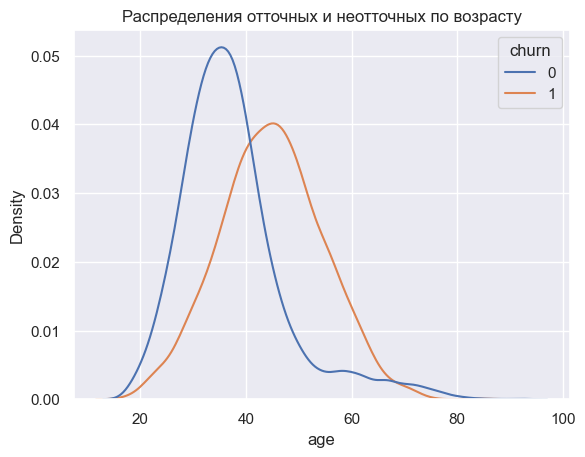

In [19]:
ax = sns.kdeplot(data = bank, x = 'age', hue = 'churn', common_norm=False)
ax.set(title="Распределения отточных и неотточных по возрасту");

Видим, что максимум оттока приходитсяна клиентов 40-60 лет.

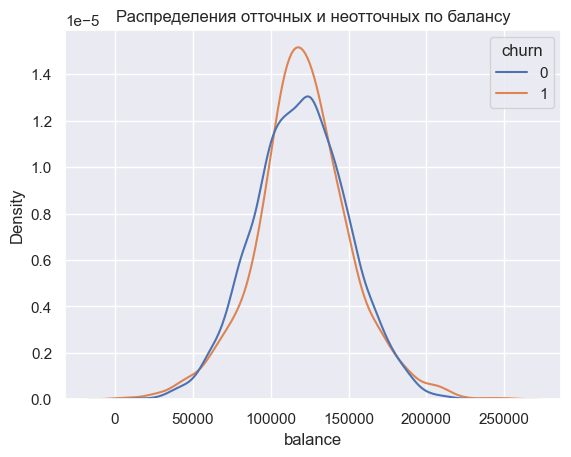

In [20]:
ax = sns.kdeplot(data = bank, x = 'balance', hue = 'churn', common_norm=False)
ax.set(title="Распределения отточных и неотточных по балансу");

Клиенты с балансом до 50 000 и свыше 175 000, а также с балансом от 100 000 до 150 000  более склонны к оттоку.

#### 3.3.1 Посмотрим на ушедших по возрасту. <a class="anchor" id="three_three_one"></a>

In [21]:
pd.cut(bank['age'], bins=4).value_counts()



(17.926, 36.5]    4609
(36.5, 55.0]      4591
(55.0, 73.5]       728
(73.5, 92.0]        72
Name: age, dtype: int64

In [22]:
cut_labels_4 = ['молодежь', 'средний возраст', 'зрелые', 'пожилые']
cut_bins = [0, 35, 55, 65, 100]
# выбор таких интервалов обусловлен графиком распределения относительно оттока. 
# И хотелось бы подобробнее посмотреть на серединку "горбик" оттока

bank['cut_age'] = pd.cut(bank['age'],
                       bins=cut_bins,
                       labels=cut_labels_4)
bank.head()

user_id  score  gender  age  objects    balance  products  credit_card  \
0  15677338    619       0   42        2        NaN         1            1   
1  15690047    608       0   41        1   83807.86         1            0   
2  15662040    502       0   42        8  159660.80         3            1   
3  15744090    699       0   39        1        NaN         2            0   
4  15780624    850       0   43        2  125510.82         1            1   

   loyalty  estimated_salary  churn  city_number  city_Ростов Великий  \
0        1         101348.88      1            0                    0   
1        1         112542.58      0            1                    0   
2        0         113931.57      1            0                    0   
3        0          93826.63      0            0                    0   
4        1          79084.10      0            1                    0   

   city_Рыбинск  city_Ярославль          cut_age  
0             0               1  средний возраст  
1             1               0  средний возраст  
2             0               1  средний возраст  
3             0               1  средний возраст  
4             1               0  средний возраст

In [23]:
cut_age = bank.groupby(['cut_age', 'churn'])['user_id'].count().reset_index()
cut_age = cut_age.rename(columns={'cut_age':'category', 'user_id':'cnt'})
cut_age_total = bank.groupby(['cut_age'])['user_id'].count().reset_index()
cut_age_total = cut_age_total.rename(columns={'cut_age':'category', 'user_id':'total'})

cut_age = cut_age.merge(cut_age_total, on='category', how='left')
cut_age['part']=(cut_age['cnt']/cut_age['total']).round(2)
cut_age

category  churn   cnt  total  part
0         молодежь      0  3806   4153  0.92
1         молодежь      1   347   4153  0.08
2  средний возраст      0  3651   5047  0.72
3  средний возраст      1  1396   5047  0.28
4           зрелые      0   277    536  0.52
5           зрелые      1   259    536  0.48
6          пожилые      0   229    264  0.87
7          пожилые      1    35    264  0.13

In [24]:
fig = px.bar(cut_age, 
             x='category',
             y='part', 
             text='part',                   
             color='churn',           
                    )
fig.update_layout(title='Доля ушедших клиентов по возрасту',
                   yaxis_title='доля',
                   xaxis_title='Категория',
                   xaxis={'categoryorder':'total descending'}
                 )
fig.show() 

Самой "неустойчивой" категорией оказалась "зрелые" (от 55 до 65 лет) - почти пополам разделились клиенты 52% осталось и 48% ушло. Возможно это связано со снижением данной категорией людей заработка и, как следствие, финансовой активности, и стремлением к закрытию всех кредитов к приближающейся пенсии.

In [25]:
cut_gender = bank.groupby(['gender', 'churn'])['user_id'].count().reset_index()
cut_gender = cut_gender.rename(columns={'gender':'gender', 'user_id':'cnt'})
cut_gender_total = bank.groupby(['gender'])['user_id'].count().reset_index()
cut_gender_total = cut_gender_total.rename(columns={'user_id':'total'})

cut_gender = cut_gender.merge(cut_gender_total, on='gender', how='left')
cut_gender['part']=(cut_gender['cnt']/cut_gender['total']).round(2)
display(cut_gender)


gender  churn   cnt  total  part
0       0      0  3404   4543  0.75
1       0      1  1139   4543  0.25
2       1      0  4559   5457  0.84
3       1      1   898   5457  0.16

In [26]:
fig = px.bar(cut_gender, 
             x='gender',
             y='part', 
             text='part',                   
             color='churn',
             
             )

fig.update_layout(title='Доля ушедших клиентов по полу',
                   yaxis_title='Количество',
                   xaxis_title='доля',
                   xaxis={'categoryorder':'total descending'}
                 )
fig.show() 

Доля уходящих клиентов среди женщин больше - 25% женщин уходят ,а среди мужчин меньше - 16%.

#### 3.3.2 Посмотрим на ушедших по количеству имеющихся продуктов. <a class="anchor" id="three_three_two"></a>

In [27]:
cut_products = bank.groupby(['products', 'churn'])['user_id'].count().reset_index()
cut_products = cut_products.rename(columns={'products':'products', 'user_id':'cnt'})
cut_products_total = bank.groupby(['products'])['user_id'].count().reset_index()
cut_products_total = cut_products_total.rename(columns={'user_id':'total'})

cut_products = cut_products.merge(cut_products_total, on='products', how='left')
cut_products['part']=(cut_products['cnt']/cut_products['total']).round(2)
display(cut_products)


products  churn   cnt  total  part
0         1      0  3675   5084  0.72
1         1      1  1409   5084  0.28
2         2      0  4242   4590  0.92
3         2      1   348   4590  0.08
4         3      0    46    266  0.17
5         3      1   220    266  0.83
6         4      1    60     60  1.00

In [28]:
fig = px.bar(cut_products, 
             x='products',
             y='part', 
             text='part',                   
             color='churn',
             
             )

fig.update_layout(title='Доля ушедших клиентов по количеству продуктов',
                   yaxis_title='Количество',
                   xaxis_title='доля',
                   xaxis={'categoryorder':'total descending'}
                 )
fig.show() 

Самые стабильные клиенты те, у которых 2 продукта банка (всего 8% оттока), те кто имеют 1 продукт - не так постоянны (28% оттока), а вот наличие 3 или 4 - это опасный показатель с точки зрения оттока (83% и 100%!!! оттока). Но количество клиентов с таким количеством продуктов невелико, так что пока рано говорить о возникшей зависимости.

#### 3.3.3 Посмотрим по городам относительно оттока <a class="anchor" id="three_three_three"></a>


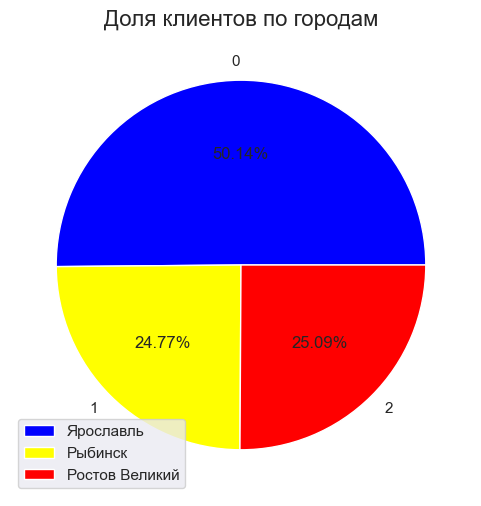

In [29]:
cnt_city.plot(kind = 'pie', autopct='%1.2f%%', figsize= (6,6), label="", colors=['blue', 'yellow', 'red']);
plt.title('Доля клиентов по городам', fontsize = 16)
plt.legend(['Ярославль', 'Рыбинск', 'Ростов Великий'])
plt.show()

In [30]:
cut_city = bank.groupby(['city_number', 'churn'])['user_id'].count().reset_index()
cut_city = cut_city.rename(columns={'user_id':'cnt'})
cut_city_total = bank.groupby(['city_number'])['user_id'].count().reset_index()
cut_city_total = cut_city_total.rename(columns={'user_id':'total'})

cut_city = cut_city.merge(cut_city_total, on='city_number', how='left')
cut_city['part']=(cut_city['cnt']*100/cut_city['total']).round(1)
cut_city

city_number  churn   cnt  total  part
0            0      0  4204   5014  83.8
1            0      1   810   5014  16.2
2            1      0  2064   2477  83.3
3            1      1   413   2477  16.7
4            2      0  1695   2509  67.6
5            2      1   814   2509  32.4

In [31]:
fig = px.bar(cut_city.sort_values(by='part', ascending=False), 
             y='part',
             x='city_number', 
             text='part',                   
             color='churn',
             
            )

fig.update_layout(title='Доля ушедших клиентов в городе',
                   yaxis_title='доля',
                   xaxis_title='Ярославль                            Рыбинск                           Ростов Великий',
                   barmode='relative'  
                  
                 )
fig.show() 



В Ростове Великом доля ушедших клиентов практически в 2 раза больше, чем в Ярославле или Рыбинске. 
Возможно это связано с особенностью выгрузки данных в Ростове Великом ,где не выгрузили данные по клиентам с нулевым балансом, как в двух других городах.

### 3.4 Портрет клиента относительно оттока <a class="anchor" id="three_four"></a>

Итак, по тем данным, что нам предоставили мы можем сказать, что **клиент, который "ушел" из банка:**\


* скорее всего, из Ростова Великого
* имеет 3 или 4 банковских продукта
* в возрасте от 55 до 65 лет
* не имеет кредитной карты
* не лоялен к банку
    

**Клиент, который остался:**

* скорее всего мужчина
* в возрасте до 50 лет
* имеет крелитный рейтинг от 500
* имеет кредитную карту
* в наличии 1 или 2 банковских продукта
* лоялен к банку


### 4. Проверка гипотез <a class="anchor" id="four"></a>


### 4.1 Проверим гипотезу: разницы в доходах между клиентами, которые ушли и остались, нет. <a class="anchor" id="four_one"></a>

Проверим гипотезы


**H0 - Нулевая гипотеза:** доход между теми клиентами, которые ушли и теми, которые остались не различается

**H1 - Альтернативная гипотеза:** доход между теми клиентами, которые ушли и теми, которые остались различается

Так как график дохода клиентов не похож на нормальное распределение, то возьмем U-критерий Манна-Уитни, который представляет собой непараметрическую версию t-критерия для независимых выборок.


In [32]:
alpha = 0.05 

results = st.mannwhitneyu(churn_0['estimated_salary'], churn_1['estimated_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу по критерию Манна-Уитни: есть различие в доходе между теми клиентами, которые ушли и теми, которые остались')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу по критерию Манна-Уитни: нет различия в доходе между теми клиентами, которые ушли и теми, которые остались'
    )
    
results_st = st.ttest_ind(churn_0['estimated_salary'], churn_1['estimated_salary'])  
print('p-значение: ', results_st.pvalue)
if results_st.pvalue < alpha:
    print('Отвергаем нулевую гипотезу по критерию Стьюдента: есть различие в доходе между теми клиентами, которые ушли и теми, которые остались')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу по критерию Стьюдента: нет различия в доходе между теми клиентами, которые ушли и теми, которые остались'
    )


p-значение:  0.22705150930153783
Не получилось отвергнуть нулевую гипотезу по критерию Манна-Уитни: нет различия в доходе между теми клиентами, которые ушли и теми, которые остались
p-значение:  0.22644042802223355
Не получилось отвергнуть нулевую гипотезу по критерию Стьюдента: нет различия в доходе между теми клиентами, которые ушли и теми, которые остались


### 4.2 Проверим гипотезу о различии score (кредитного рейтинга) между теми клиентами, которые ушли и теми, которые остались <a class="anchor" id="four_two"></a>

Проверим гипотезы

**H0 - Нулевая гипотеза:** Кредитный рейтинг клиентов, которые ушли и тех, которые остались, не различается

**H1 - Альтернативная гипотеза:** Кредитный рейтинг клиентов, которые ушли и тех, которые остались, различается

In [33]:

results = st.mannwhitneyu(churn_0['score'], churn_1['score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть различие в кредитном рейтинге')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: нет различия в кредитном рейтинге'
    )

p-значение:  0.019868661172728338
Отвергаем нулевую гипотезу: есть различие в кредитном рейтинге


### 4.3 Проверим гипотезу о влиянии количества объектов недвижимости во владении клиента на его отток из банка. <a class="anchor" id="four_three"></a>

Проверим гипотезы

**H0 - Нулевая гипотеза:** Количество объектов у клиентов, которые ушли и тех, которые остались, не различается

**H1 - Альтернативная гипотеза:** Количество объектов у клиентов, которые ушли и тех, которые остались, различается

In [34]:
results = st.mannwhitneyu(churn_0['objects'], churn_1['objects'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: есть различие в Количестве объектов')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу: нет различия в количестве объектов'
    )

p-значение:  0.16219376122918827
Не получилось отвергнуть нулевую гипотезу: нет различия в количестве объектов


### 4.4 Вывод <a class="anchor" id="four_four"></a>

Не получилось отвергнуть гипотезу, таким образом подтвердить, что доходы не отличаются у тех клиентов, которые ушли и теми, которые остались не смогли.
Гипотезу о том, что кредитный рейтинг клиентов, которые ушли и тех, которые остались, не различается, мы отвергли.
Гипотезу о количестве объектов у клиентов, которые ушли и тех, которые остались, не различаются, не смогли отвергнуть.
Данные тесты подтверждают, что нет зависимости между оттоком клиентов и количеством объектов в их собственности и их доходом. А вот клиенты с низким кредитным рейтингом чаще уходят из банка и здесь зависмость прослеживается.

## 5. Общий вывод <a class="anchor" id="five"></a>


### 5.1 ОШИБКИ: <a class="anchor" id="five_one"></a>

В данном проекте довольно большой процент пропусков в balance. Это связано, как мне кажется, с тем что база данных слита из данных 3х городов и стандарты выгрузки данных различаются. На это стоит обратить внимание. Стоит договориться о формате выгрузки данных: с нулевыми значениями или без.

При наличии признака оттока (churn = 1) balance  также не нулевой. Это невостребованные счета? Этот момент также требует уточнения. Обычно в банке все счета закрываются только при нулевом балансе. А если у клиента есть баланс на счетах, то можно ли его назвать ушедшим? Стоит обратить на это внимание и проверить исходные данные в этом разрезе.

Признак objects - нетипичный для среднего жителя России, тем более областных городов. Обычный житель России имеет 1-2 объекта в собственности (квартира, дача, может еще гараж и автомобиль). В нашем проекте - среднее число объектов - 5, что не вписывается в картину среднего банковского клиента.
Возможно это сделано намеренно, то есть отобрали только зажиточных клиентов. А возможно - это ошибка выгрузки данных. 

Признак estimate_salary - средняя зарплата клиента имеет равномерное распределение, при этом имеются кардинально низкие зарплаты с двузначными числами. Это явно ошибка, возникшая либо из-за ручного ввода, либо от разного формата выгрузки. Необходимо обратить внимание.



### 5.2 Выводы <a class="anchor" id="five_two"></a>


Банк имеет 3 филиала, в трех городах: Ярославле(50% всех клиентов), Рыбинске(почти25%) и Ростове Великом(25%).

Количество мужчин среди клиентов немного выше (на 5%). Средний балл кредитного рейтинга - 652, средний возраст клиента банка - 37, наибольшее число клиентов имеют возраст от 32 до 44 лет.

Число объектов в собственности в среднем 5 и количество клиентов с числом объектов от 1 до 9 примерно одинаково.
Средний клиент банка имеет на балансе от 100 до 140 тысяч рублей и имеет 1 или 2 банковских продукта, причем у большинства (70%) один из продуктов - кредитная карта, со средней зарплатой от 50 до 150 тысяч рублей.

Портрет клиента который ушел из банка (churn = 1):

скорее всего, из Ростова Великого, в возрасте от 55 до 65 лет, имеет 3 или 4 банковских продукта, при этом не имеет кредитной карты и не лоялен к банку.


### 5.3 Рекомендации: <a class="anchor" id="five_three"></a>

* Настроить единый формат выгрузки данных для анализа во всех 3х филиалах
* Увеличивать лояльность и активность клиентов, используя информирование о выгодных условиях, ставках, новых возможностей рефинанисирования итп
* Предлагать клиенту с 1 продуктом дополнительные продукты, в том числе кредитную карту
* провести исследование клиентов с 3мя и более продуктов, понять, что приводит к катастрофическому оттоку: плохой продукт банка, закредитованность клиента итп.

 

In [35]:
churn_0.drop(['churn', 'user_id'], axis=1).describe()

score       gender          age      objects        balance  \
count  7963.000000  7963.000000  7963.000000  7963.000000    4846.000000   
mean    651.853196     0.572523    37.408389     5.033279  119535.864270   
std      95.653837     0.494744    10.125363     2.880658   29944.927372   
min     405.000000     0.000000    18.000000     0.000000   14262.800000   
25%     585.000000     0.000000    31.000000     3.000000   99118.230000   
50%     653.000000     1.000000    36.000000     5.000000  119791.215000   
75%     718.000000     1.000000    41.000000     7.000000  139747.397500   
max     850.000000     1.000000    92.000000    10.000000  221532.800000   

          products  credit_card      loyalty  estimated_salary  city_number  \
count  7963.000000  7963.000000  7963.000000       7963.000000  7963.000000   
mean      1.544267     0.707146     0.554565      99738.391772     0.684918   
std       0.509536     0.455101     0.497045      57405.586966     0.801002   
min       1.000000     0.000000     0.000000         90.070000     0.000000   
25%       1.000000     0.000000     0.000000      50783.490000     0.000000   
50%       2.000000     1.000000     1.000000      99645.040000     0.000000   
75%       2.000000     1.000000     1.000000     148609.955000     1.000000   
max       3.000000     1.000000     1.000000     199992.480000     2.000000   

       city_Ростов Великий  city_Рыбинск  city_Ярославль  
count          7963.000000   7963.000000     7963.000000  
mean              0.212859      0.259199        0.527942  
std               0.409355      0.438222        0.499250  
min               0.000000      0.000000        0.000000  
25%               0.000000      0.000000        0.000000  
50%               0.000000      0.000000        1.000000  
75%               0.000000      1.000000        1.000000  
max               1.000000      1.000000        1.000000

In [36]:
churn_1.drop(['churn', 'user_id'], axis=1).describe()

score       gender          age      objects        balance  \
count  2037.000000  2037.000000  2037.000000  2037.000000    1537.000000   
mean    645.351497     0.440844    44.837997     4.932744  120746.971132   
std     100.321503     0.496610     9.761562     2.936106   30555.192802   
min     350.000000     0.000000    18.000000     0.000000    3768.690000   
25%     578.000000     0.000000    38.000000     2.000000  103700.690000   
50%     646.000000     0.000000    45.000000     5.000000  119948.090000   
75%     716.000000     1.000000    51.000000     8.000000  137986.580000   
max     850.000000     1.000000    84.000000    10.000000  250898.090000   

          products  credit_card      loyalty  estimated_salary  city_number  \
count  2037.000000  2037.000000  2037.000000       2037.000000  2037.000000   
mean      1.475209     0.699067     0.360825     101465.677531     1.001964   
std       0.801521     0.458776     0.480358      57912.418071     0.893106   
min       1.000000     0.000000     0.000000         11.580000     0.000000   
25%       1.000000     0.000000     0.000000      51907.720000     0.000000   
50%       1.000000     1.000000     0.000000     102460.840000     1.000000   
75%       2.000000     1.000000     1.000000     152422.910000     2.000000   
max       4.000000     1.000000     1.000000     199808.100000     2.000000   

       city_Ростов Великий  city_Рыбинск  city_Ярославль  
count          2037.000000   2037.000000     2037.000000  
mean              0.399607      0.202749        0.397644  
std               0.489938      0.402146        0.489531  
min               0.000000      0.000000        0.000000  
25%               0.000000      0.000000        0.000000  
50%               0.000000      0.000000        0.000000  
75%               1.000000      0.000000        1.000000  
max               1.000000      1.000000        1.000000